In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from echoes.tasks import MemoryCapacity
from echoes.model_selection import GridSearchTask
from echoes.plotting import set_mystyle
set_mystyle()

In [3]:
# Task parameters
task_params_fixed = dict(
    inputs_func=np.random.uniform,
    inputs_params={"low":-.5, "high":.5, "size":200},
    lags = [1, 2, 5, 10, 15, 20, 25, 30, 35, 40]
)

param_grid = dict(
    # Fixed params - remember to put them in a list, despite them being individual values
    n_reservoir=[20, 30, 40, 50],
    n_transient=[100],
    regression_method=["pinv"],    
    
    # Variable params for grid search 
    spectral_radius=list(np.linspace(.8, .99, 50)),
    bias=[0, .25, .5, 1],
    fit_only_states=[True, False],
    sparsity=[0, .2, .4, .6, .8]
)

grid = (GridSearchTask(MemoryCapacity, task_params_fixed, param_grid, n_jobs=-2)
        .fit())

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-2)]: Done  67 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-2)]: Done 701 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-2)]: Done 1709 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-2)]: Done 3005 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-2)]: Done 4589 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-2)]: Done 6461 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-2)]: Done 7987 out of 8000 | elapsed:   26.1s remaining:    0.0s
[Parallel(n_jobs=-2)]: Done 8000 out of 8000 | elapsed:   26.1s finished


best score: 4.33980580697898
best parameters: {'bias': 0, 'fit_only_states': True, 'n_reservoir': 50, 'n_transient': 100, 'regression_method': 'pinv', 'sparsity': 0.2, 'spectral_radius': 0.9744897959183674}


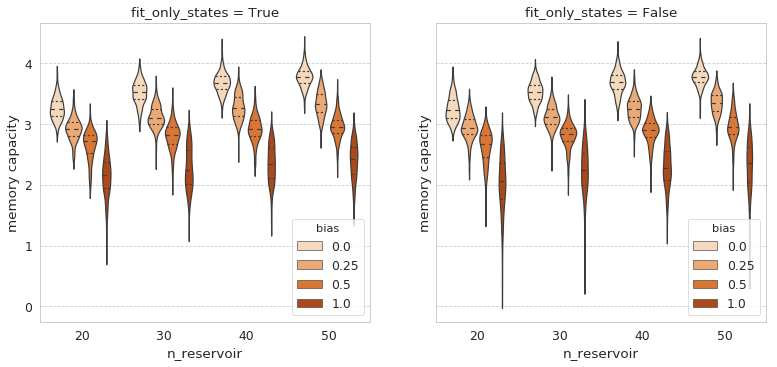

In [6]:
print("best score:", grid.best_score_)
print("best parameters:", grid.best_params_)

data = grid.to_dataframe()
data["memory capacity"] = data["scores"] # revert to memory capacity

fig, axes = plt.subplots(figsize=(13, 5.5), ncols=2, sharey=True)
for ax, onlystates in zip(axes, (True, False)): 
    sns.violinplot(
        x="n_reservoir", 
        y="memory capacity", 
        data=data[data.fit_only_states == onlystates], 
        hue="bias", 
        ax=ax,
        inner="quartile", 
        palette="Oranges",
    ) 
    ax.set_title(f"fit_only_states = {onlystates}")

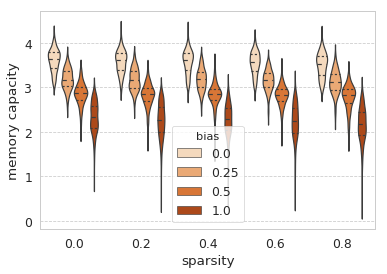

In [7]:
sns.violinplot(x="sparsity", y="memory capacity", 
               hue="bias", data=data, 
               palette="Oranges", inner="quartile",);